In [72]:
#first read the data using pandas library
import pandas as pd
dataset = pd.read_csv('Data.csv')

In [73]:
display(dataset)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


Malignanat 212
Benign 357


/home/uca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


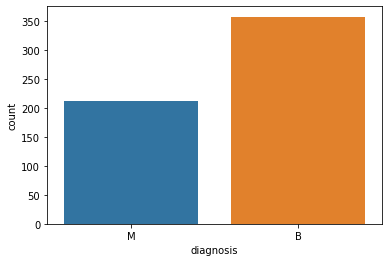

In [74]:

import seaborn as sb
sb.countplot(dataset['diagnosis'], label= 'Count')

B,M = dataset['diagnosis'].value_counts()
print('Malignanat', M)
print('Benign', B)


In [75]:
#lets now classify data into dependent and independent variables
x = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1]

In [76]:
#now lets convert the dependent variables into numerical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [77]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [78]:
#now lets scale our data using standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(x_train)
ss.fit_transform(x_test)

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [79]:
#lets import our classifier and train our data and import dense
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

#now we are making our first hidden layer 

#classifier.add(Dense(input_dim = 30, output_dim = 20, init='uniform',  activation='sigmoid'))
classifier.add(Dense(20, input_dim=30, kernel_initializer='glorot_uniform', activation='sigmoid'))

#lets add another hidden layer
classifier.add(Dense(20, kernel_initializer='uniform', activation='sigmoid'))

#now add third hidden layer
classifier.add(Dense(20, kernel_initializer='uniform', activation='relu'))

classifier.add(Dense(20, kernel_initializer='uniform', activation='tanh'))

In [80]:
#lets add the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

#compiling, adding loss function and also adding accuracy metrics
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

#fitting data while speciying batch size and epochs
classifier.fit(x_train, y_train, batch_size=100, epochs=100)


Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 0.6928 - accuracy: 0.5714
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.6374
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.6374
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.6374
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.6374
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.6374
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.6374
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.6374
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6374
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6374
Epoch 11/100
5/5 [===========

In [69]:
# Predicting the Test set results
y_predict = classifier.predict(x_test)
y_predict = (y_predict > 0.5)

[[62  5]
 [ 7 40]]


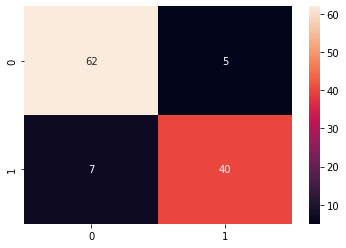

In [70]:
#plt.figure(2)
import matplotlib.pyplot as plt


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sb.heatmap(cm,annot=True)
plt.savefig('h.png')
print(cm)

In [71]:
#now find report using confusion metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        67
           1       0.89      0.85      0.87        47

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114

[[62  5]
 [ 7 40]]
